# BDT Benchmark Tests

### Variables being tested:

- Test size/Training size
    - test sizes: 0.4, 0.25, 0.6
    - training sizes: 0.6, 0.75, 0.4
- n estimators
    - 100, 10000, 5000
- learning rate
    - 1, 10, 50
- cross validation

### Initial code (without any changes)

- test size = 0.4
- training size = 0.6
- random state = 2
- n estimators = 100
- learning rate = 1

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

import pandas as pd

signal = pd.read_csv('.//data//300.csv', index_col=0)
background = pd.read_csv('.//data//background.csv', index_col=0)

signal.drop(["nTags", "MCChannelNumber", "mVHres"], axis=1, inplace=True)
background.drop(["nTags", "MCChannelNumber", "mVHres"], axis=1, inplace=True)

In [3]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9059502401713917
	Test Score  = 0.9060
	Number of mis-classified test data = 25866.0



Study the test data

confusion matrix (test) = 
 [[249072    108]
 [ 25758    144]]


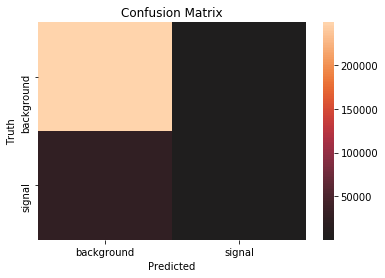


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90596789 0.9059073  0.90617275 0.90584557 0.90589404]
	mean = 0.9060


In [9]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

### Test size/Training size

- test size = 0.25
- training size = 0.75

In [10]:
train_bkg, test_bkg = train_test_split(background, test_size=0.25, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.25, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9059399701809115
	Test Score  = 0.9060
	Number of mis-classified test data = 16161.0



Study the test data

confusion matrix (test) = 
 [[155695     43]
 [ 16118     71]]


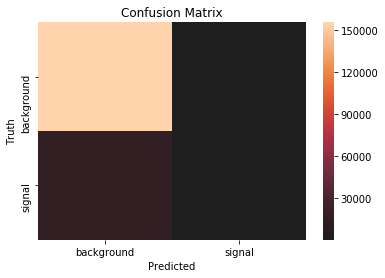


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90593858 0.90603552 0.90582134 0.90589889 0.90591828]
	mean = 0.9059


In [11]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

- test size = 0.6
- training size = 0.4

In [13]:
train_bkg, test_bkg = train_test_split(background, test_size=0.6, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.6, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9059804203125624
	Test Score  = 0.9060
	Number of mis-classified test data = 38807.0



Study the test data

confusion matrix (test) = 
 [[373595    175]
 [ 38632    221]]


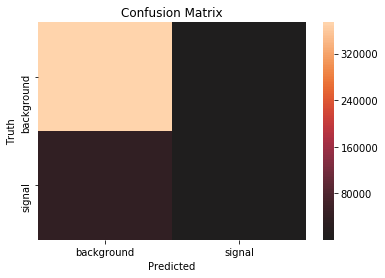


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90584728 0.90608187 0.9058274  0.90575469 0.90573651]
	mean = 0.9058


In [14]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

- test size = 0.8
- training size = 0.2

In [15]:
train_bkg, test_bkg = train_test_split(background, test_size=0.8, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.8, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=100).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9060127962774466
	Test Score  = 0.9060
	Number of mis-classified test data = 51737.0



Study the test data

confusion matrix (test) = 
 [[498016    344]
 [ 51393    411]]


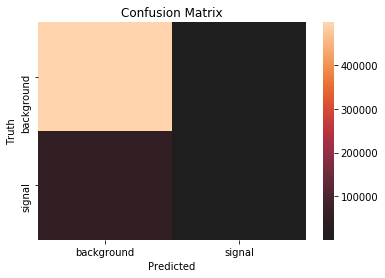


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90595463 0.90599098 0.9061364  0.90595463 0.90570016]
	mean = 0.9059


In [16]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))

### n estimators

- n estimators = 1000

In [20]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2)
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2)

train_y = len(train_bkg) * [0] + len(train_signal) * [1]
test_y = len(test_bkg) * [0] + len(test_signal) * [1]

train_x = pd.concat([train_bkg, train_signal], ignore_index=True)
test_x = pd.concat([test_bkg, test_signal], ignore_index=True)

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)


BDT_clf = AdaBoostClassifier(n_estimators=1000).fit(train_x, train_y)
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("Decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score)
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Decision Tree Classifier Score is:
	Train Score =  0.9062265220952833
	Test Score  = 0.9061
	Number of mis-classified test data = 25831.0



Study the test data

confusion matrix (test) = 
 [[248954    226]
 [ 25605    297]]


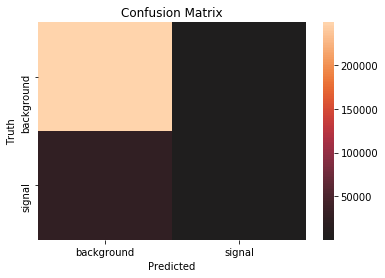


Check ground truth against predictions for the test sample
Truth	Prediction	Correct Prediction

Run Cross Validation On the Sample
cross validation scores =  [0.90605271 0.90584671 0.90590616 0.90596675 0.90610004]
	mean = 0.9060


In [21]:
print("\n\033[1mStudy the test data\033[0m")

predictions = BDT_clf.predict(test_x)
BDTcm = confusion_matrix(test_y, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)

ax= plt.subplot()
sns.heatmap(BDTcm, center=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['background', 'signal']); ax.yaxis.set_ticklabels(['background', 'signal']);
plt.show()

print("\n\033[1mCheck ground truth against predictions for the test sample\033[0m")
print("Truth\tPrediction\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == test_y[i]:
        Match = True

print("\n\033[1mRun Cross Validation On the Sample\033[0m")
scores = cross_val_score(BDT_clf, train_x, train_y, cv=5)
print("cross validation scores = ", scores)
print("\tmean = {:5.4f}".format(scores.mean()))